<a href="https://colab.research.google.com/github/marianamartiyns/API-LogisticRegression/blob/main/Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Churn com Regressão Logística
```
# O que é Churn?
Churn é uma métrica que indica o quanto sua empresa perdeu de receita ou clientes.
```

O dataset utilizado é proveniente de uma empresa fictícia de telefonia, criado e disponibilizado pela IBM para fins didáticos.

O dicionário com as descrições das features pode ser encontrado [neste link no Kaggle](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset).

# 🧩 Libraries

In [9]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif, RFE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

In [10]:
from sklearn import set_config
set_config(display='diagram')

# 🗂️ Data


In [11]:
df = pd.read_csv('/content/churn_df.csv', index_col=0)
display(df)

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,1,0,0,0,2,1,0,0,...,0,0,0,0,1,3,53.85,108.15,1,3239
9237-HQITU,34.059281,-118.307420,0,0,0,1,2,1,0,1,...,0,0,0,0,1,2,70.70,151.65,1,2701
9305-CDSKC,34.048013,-118.293953,0,0,0,1,8,1,2,1,...,0,2,2,0,1,2,99.65,820.50,1,5372
7892-POOKP,34.062125,-118.315709,0,0,1,1,28,1,2,1,...,2,2,2,0,1,2,104.80,3046.05,1,5003
0280-XJGEX,34.039224,-118.266293,1,0,0,1,49,1,2,1,...,0,2,2,0,1,0,103.70,5036.30,1,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569-WGERO,34.341737,-116.539416,0,0,0,0,72,1,0,2,...,1,1,1,2,1,0,21.15,1419.40,0,5306
6840-RESVB,34.667815,-117.536183,1,0,1,1,24,1,2,0,...,2,2,2,1,1,3,84.80,1990.50,0,2140
2234-XADUH,34.559882,-115.637164,0,0,1,1,72,1,2,1,...,0,2,2,1,1,1,103.20,7362.90,0,5560


# 🤖 Model Building

## Correlation matrix

In [12]:
df_features = df.drop(columns='Churn Value')
target = df['Churn Value']

In [13]:
df_features.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,1,0,0,0,2,1,0,0,...,0,0,0,0,0,1,3,53.85,108.15,3239
9237-HQITU,34.059281,-118.307420,0,0,0,1,2,1,0,1,...,0,0,0,0,0,1,2,70.70,151.65,2701
9305-CDSKC,34.048013,-118.293953,0,0,0,1,8,1,2,1,...,2,0,2,2,0,1,2,99.65,820.50,5372
7892-POOKP,34.062125,-118.315709,0,0,1,1,28,1,2,1,...,2,2,2,2,0,1,2,104.80,3046.05,5003
0280-XJGEX,34.039224,-118.266293,1,0,0,1,49,1,2,1,...,2,0,2,2,0,1,0,103.70,5036.30,5340


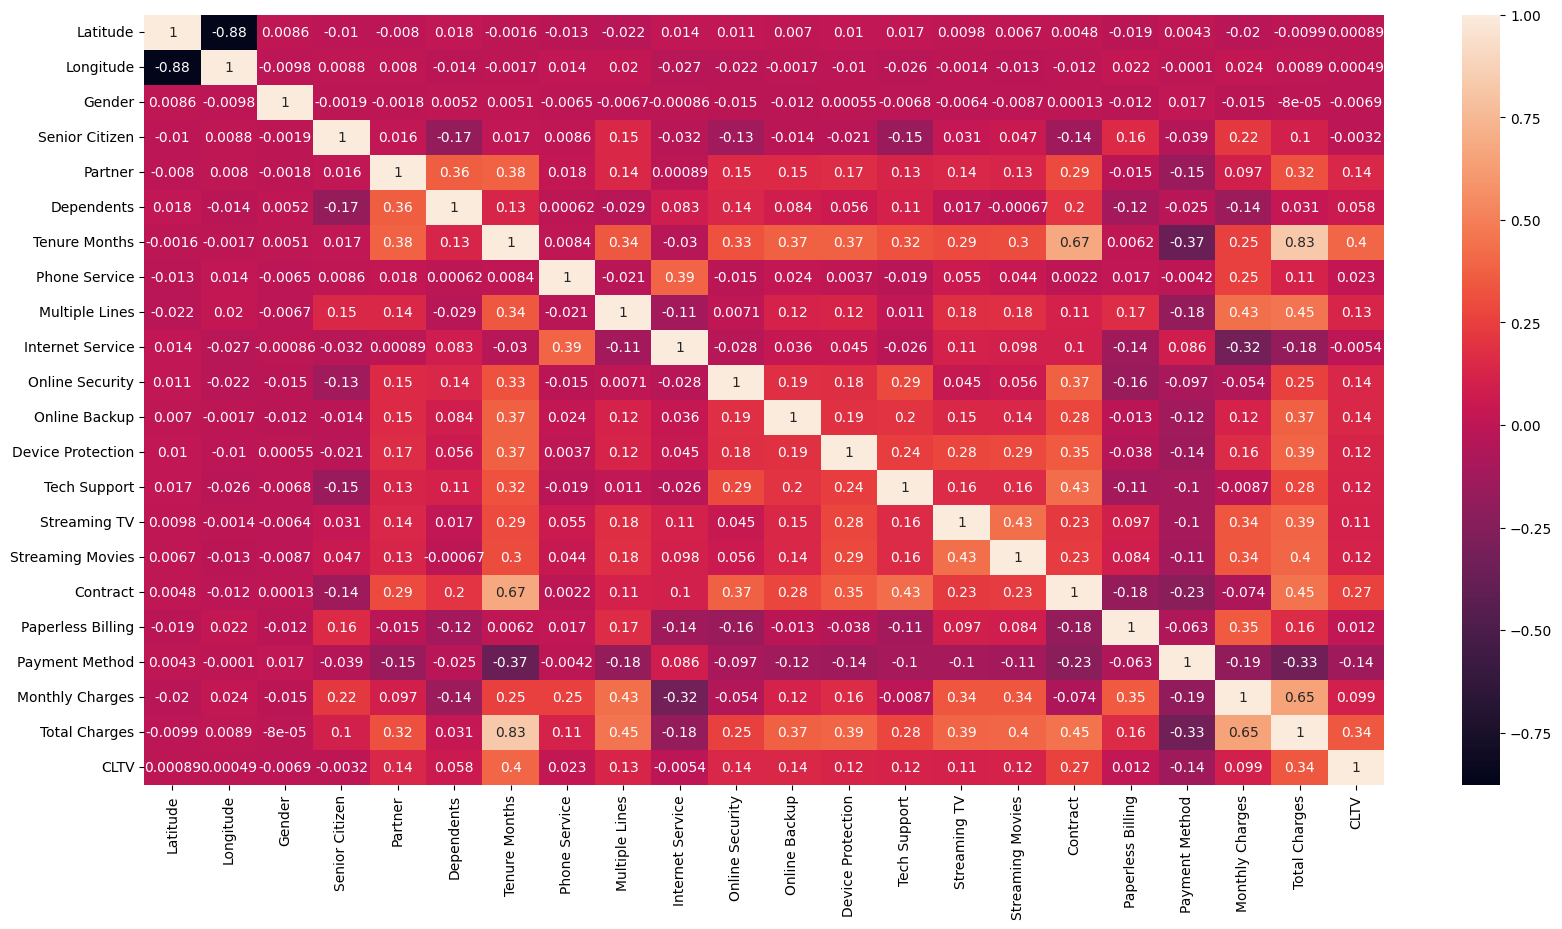

In [14]:
plt.figure(figsize = (20,10))
sns.heatmap(df_features.corr(),annot = True)
plt.show()

Pelo mapa de correlação, percebemos que latitude e longitude (variáveis independentes) estão altamente relacionadas entre si. Para evitar a instabilidade dos coeficientes e a dificuldade de interpretação, vamos excluí-las do nosso modelo, evitando assim a multicolinearidade.

In [15]:
df_features.drop(columns=['Latitude', 'Longitude'], inplace=True)

## Train & Test

In [16]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_features, target, train_size=0.7, test_size=0.3, random_state=100)

In [17]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")

X_train: 4930
X_test: 2113


## First version of the model

In [18]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial()) # O modelo usado é um Generalized Linear Model
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Churn Value   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1927.5
Date:                Tue, 04 Mar 2025   Deviance:                       3855.0
Time:                        17:02:27   Pearson chi2:                 5.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3114
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4641      0.27

Vamos observar `P>|z|`: Ele testa se o coeficiente é estatisticamente significativo.

- Um p-valor menor que 0,05 (ou 0,01) indica que a variável é estatisticamente significativa.
- Se o p-valor for alto (por exemplo, > 0,05), a variável pode não ter um impacto significativo no churn.

## Recursive Feature Elimination (RFE)

Com base no p-value vamos eliminar as variavéis que não são significativas para o modelo.

In [19]:
logreg = LogisticRegression()

In [20]:
rfe = RFE(logreg, n_features_to_select=15)           # O RFE vai selecionar as 15 features mais importantes com base no modelo fornecido (logreg)
rfe = rfe.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [21]:
print(rfe.support_)  # Mostra quais features foram selecionadas (True/False)

[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True False False False False]


In [22]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_)) # Mostra a ordem de importância das features (1 é a mais importante)

[('Gender', True, 1),
 ('Senior Citizen', True, 1),
 ('Partner', True, 1),
 ('Dependents', True, 1),
 ('Tenure Months', True, 1),
 ('Phone Service', True, 1),
 ('Multiple Lines', True, 1),
 ('Internet Service', True, 1),
 ('Online Security', True, 1),
 ('Online Backup', True, 1),
 ('Device Protection', False, 2),
 ('Tech Support', True, 1),
 ('Streaming TV', True, 1),
 ('Streaming Movies', True, 1),
 ('Contract', True, 1),
 ('Paperless Billing', True, 1),
 ('Payment Method', False, 3),
 ('Monthly Charges', False, 4),
 ('Total Charges', False, 5),
 ('CLTV', False, 6)]

In [23]:
# Features/Colunas descartadas pelo RFE
print(X_train.columns[~rfe.support_])

Index(['Device Protection', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'CLTV'],
      dtype='object')


In [24]:
# Features mais importantes com o RFE
col = X_train.columns[rfe.support_]
col

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing'],
      dtype='object')

## Second version of the model

In [25]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Churn Value   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4914
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2000.8
Date:                Tue, 04 Mar 2025   Deviance:                       4001.7
Time:                        17:02:27   Pearson chi2:                 4.83e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2906
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3781      0.15

In [26]:
# fazendo a predição no train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.77960404, 0.05693112, 0.03797537, 0.24822615, 0.01491865,
       0.02312412, 0.21353288, 0.65488148, 0.57875191, 0.00898721])

## Training results

In [27]:
result_train = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
result_train['CustomerID'] = y_train.index
result_train.head()

,Churn,Churn_Prob,CustomerID
0,1,0.779604,9124-LHCJQ
1,0,0.056931,1470-PSXNM
2,0,0.037975,9128-CPXKI
3,1,0.248226,2235-ZGKPT
4,0,0.014919,8510-TMWYB


In [28]:
# Criando nova coluna 'predicted' com 1 se Churn_Prob > 0.5, caso contrário 0
result_train['Predicted'] = result_train.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
result_train.head()

,Churn,Churn_Prob,CustomerID,Predicted
0,1,0.779604,9124-LHCJQ,1
1,0,0.056931,1470-PSXNM,0
2,0,0.037975,9128-CPXKI,0
3,1,0.248226,2235-ZGKPT,0
4,0,0.014919,8510-TMWYB,0


In [29]:
# Calculando a matriz de confusão
cm_train = metrics.confusion_matrix(result_train.Churn, result_train.Predicted)
print(cm_train)

[[3272  355]
 [ 564  739]]



**Classe 0** (negativo): previu corretamente em 3272 casos
                    previu incorretamente em 564 casos


**Classe 1** (positivo): previu corretamente 739 casos
                    previu incorretamente em 355 casos

In [30]:
# Acurácia
accuracy = metrics.accuracy_score(result_train['Churn'], result_train['Predicted'])
print("Acurácia:", accuracy)

# Precisão
precision = metrics.precision_score(result_train['Churn'], result_train['Predicted'])
print("Precisão:", precision)

Acurácia: 0.8135902636916835
Precisão: 0.6755027422303473


# 🚩 Test results

In [31]:
# Fazendo a predição no conjunto de teste
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm).values.reshape(-1)

In [32]:
# Criando um DataFrame com os resultados
result_test = pd.DataFrame({'Churn': y_test.values, 'Churn_Prob': y_test_pred})
result_test['CustomerID'] = y_test.index
result_test['Predicted'] = result_test.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
result_test

,Churn,Churn_Prob,CustomerID,Predicted
0,0,0.484261,8263-OKETD,0
1,1,0.152266,7136-RVDTZ,0
2,1,0.468468,6413-XKKPU,0
3,0,0.671833,3338-CVVEH,1
4,0,0.508696,0916-QOFDP,1
...,...,...,...,...
2108,1,0.061890,6635-MYYYZ,0
2109,0,0.142792,0537-QYZZN,0
2110,0,0.003656,5320-BRKGK,0
2111,0,0.114649,7874-ECPQJ,0


## Matriz de confusão

In [33]:
# Calculando a matriz de confusão
cm_test = metrics.confusion_matrix(result_test.Churn, result_test.Predicted)
print(cm_test)

[[1369  178]
 [ 275  291]]


**Classe 0** (negativo): previu corretamente em 1369 casos
                    previu incorretamente em 275 casos


**Classe 1** (positivo): previu corretamente 291 casos
                    previu incorretamente em 178 casos

## Acurácia e Precisão

In [34]:
# Acurácia
accuracy = metrics.accuracy_score(result_test['Churn'], result_test['Predicted'])
print("Acurácia:", accuracy)

# Precisão
precision = metrics.precision_score(result_test['Churn'], result_test['Predicted'])
print("Precisão:", precision)

Acurácia: 0.7856128726928537
Precisão: 0.6204690831556503


## Curva Roc

In [35]:
# Calculando o AUC
auc_score = roc_auc_score(result_test.Churn, result_test.Churn_Prob)
print(f'AUC: {auc_score:.4f}')

AUC: 0.8235


## Índice AUC

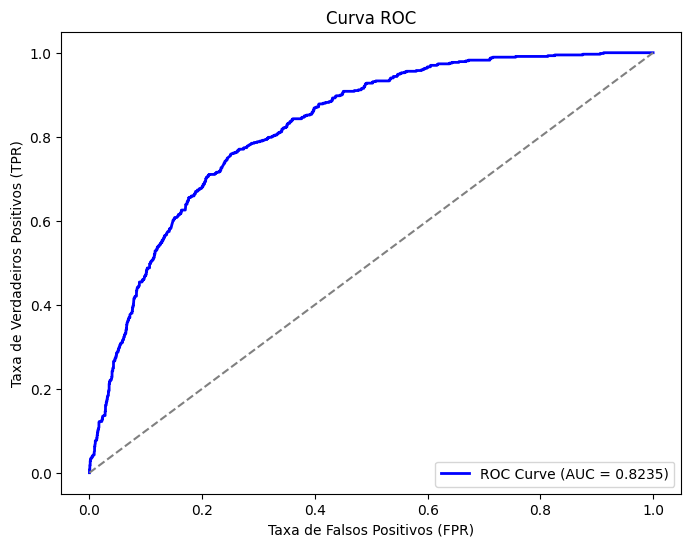

In [36]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(result_test.Churn, result_test.Churn_Prob)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## Salvando o Modelo


In [37]:
import pickle

with open("logm2.pkl", "wb") as f:
    pickle.dump(res, f)  # 'res' é o modelo ajustado (logm2.fit())